In [1]:
import numpy as np, basic, local, curvedsky as cs, healpy as hp
from matplotlib.pyplot import *

In [42]:
dirmass = '../data/lensing/LB_MASS_FG1/'

In [43]:
plm = hp.fitsfunc.read_alm(dirmass+'MASS/phi_eb_sims_0001.fits')

In [63]:
A = hp.read_cl(dirmass+'N0_and_A/Norm.fits')
n0 = hp.read_cl(dirmass+'N0_and_A/N0.fits')*A**2

In [45]:
print(np.shape(plm))

(525825,)


In [46]:
nside = 256
lmax = 500
l = np.linspace(0,lmax,lmax+1)

In [47]:
phi = hp.sphtfunc.alm2map(plm, nside)

/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/healpy/sphtfunc.py:824: UserWarning: Sigma is 0.000000 arcmin (0.000000 rad) 
  sigma * 60 * 180 / np.pi, sigma
/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/healpy/sphtfunc.py:829: UserWarning: -> fwhm is 0.000000 arcmin
  sigma * 60 * 180 / np.pi * (2.0 * np.sqrt(2.0 * np.log(2.0)))


/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/healpy/projaxes.py:920: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_over(newcm(1.0))
/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/healpy/projaxes.py:921: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_under(bgcolor)
/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/healpy/projaxes.py:922: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colorm

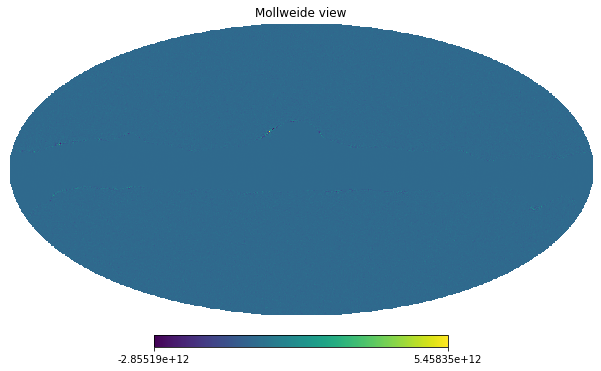

In [48]:
hp.mollview(phi)

In [54]:
palm = cs.utils.hp_map2alm(nside,lmax,lmax,phi)*A[:lmax+1,None]

In [55]:
clpp = cs.utils.alm2cl(lmax,palm)

No handles with labels found to put in legend.


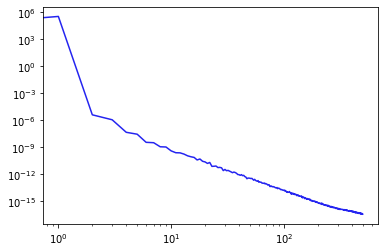

In [56]:
loglog(l,clpp)
legend()

In [36]:
pilm = hp.read_alm('../data/lensing/S4BIRD/CMB_Lensed_Maps/MASS/phi_sims_0001.fits')

In [37]:
pmap = hp.sphtfunc.alm2map(pilm,nside)

/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/healpy/sphtfunc.py:824: UserWarning: Sigma is 0.000000 arcmin (0.000000 rad) 
  sigma * 60 * 180 / np.pi, sigma
/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/healpy/sphtfunc.py:829: UserWarning: -> fwhm is 0.000000 arcmin
  sigma * 60 * 180 / np.pi * (2.0 * np.sqrt(2.0 * np.log(2.0)))


In [38]:
Palm = cs.utils.hp_map2alm(nside,lmax,lmax,pmap)

In [57]:
PP = cs.utils.alm2cl(lmax,Palm)
xP = cs.utils.alm2cl(lmax,palm,Palm)

In [58]:
L, __, __, __, pp, tp = np.loadtxt('../data/lensing/S4BIRD/CAMB/BBSims_scal_dls.dat',skiprows=1,unpack=True)

In [67]:
# mean field
mplm = 0.
for i in range(0,200):
    mplm += hp.fitsfunc.read_alm(dirmass+'MASS/phi_eb_sims_'+str(i+10).zfill(4)+'.fits')/200.

In [68]:
mphi = hp.sphtfunc.alm2map(mplm, nside)

/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/healpy/sphtfunc.py:824: UserWarning: Sigma is 0.000000 arcmin (0.000000 rad) 
  sigma * 60 * 180 / np.pi, sigma
/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/healpy/sphtfunc.py:829: UserWarning: -> fwhm is 0.000000 arcmin
  sigma * 60 * 180 / np.pi * (2.0 * np.sqrt(2.0 * np.log(2.0)))


In [70]:
mpalm = cs.utils.hp_map2alm(nside,lmax,lmax,mphi)*A[:lmax+1,None]
mclpp = cs.utils.alm2cl(lmax,mpalm)

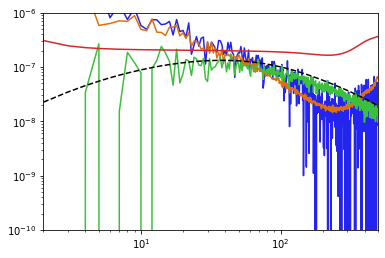

In [78]:
fac = (l*(l+1))**2/2/np.pi
xlim(2,lmax)
ylim(1e-10,1e-6)
loglog(l,(clpp-n0[:lmax+1])*fac)
loglog(l,(mclpp-n0[:lmax+1]/200)*fac)
loglog(l,xP*fac)
loglog(L[:lmax+1],pp[:lmax+1]/2.72e6**2/2/np.pi,color='k',ls='--')
loglog(l,n0[:lmax+1]*fac)